The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's



This is an assignment --> Linear Regression with all the important concept

#####  Def of Linear Regresion : It is used to find the best fit line that represent entire data set and In general it is used to find the linear relationship between dependent variable and independent variable where the error rate should be very less.¶

Formula to calculate the Linear relation is y = mx + c

In [1]:
!pip install pandas-profiling

In [2]:
# Loading all the required packages 
import numpy as np
import pandas as pd 
import os
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
import pickle


In [3]:
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [5]:
# Let's summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

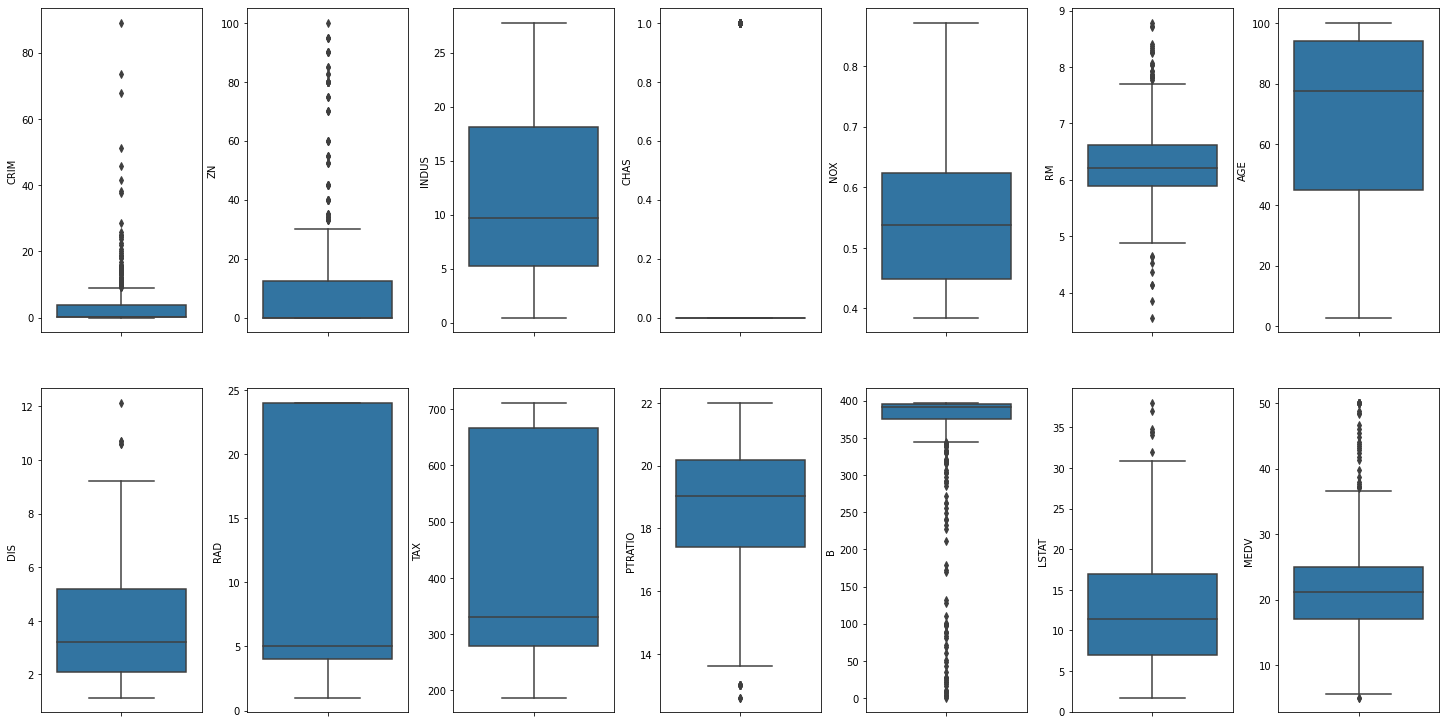

In [6]:

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [7]:
    for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [8]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


Let's see how these features plus MEDV distributions looks like

C:\Users\mksmu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mksmu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mksmu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

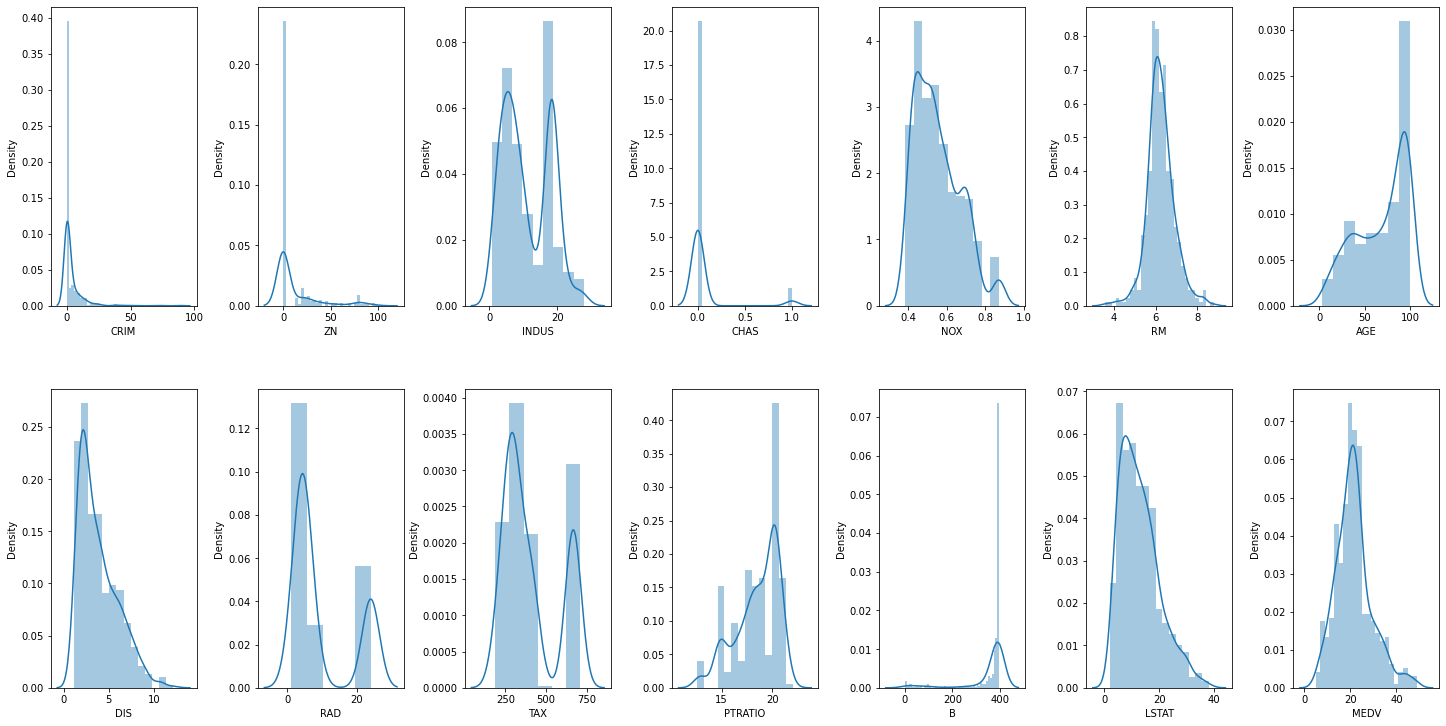

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise  correlation on data.

<AxesSubplot:>

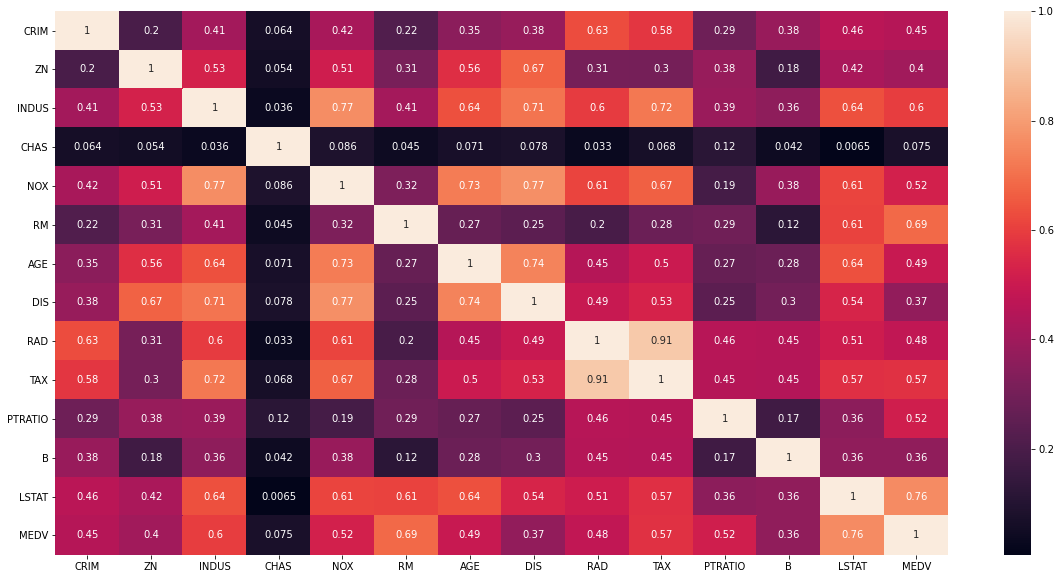

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV. 

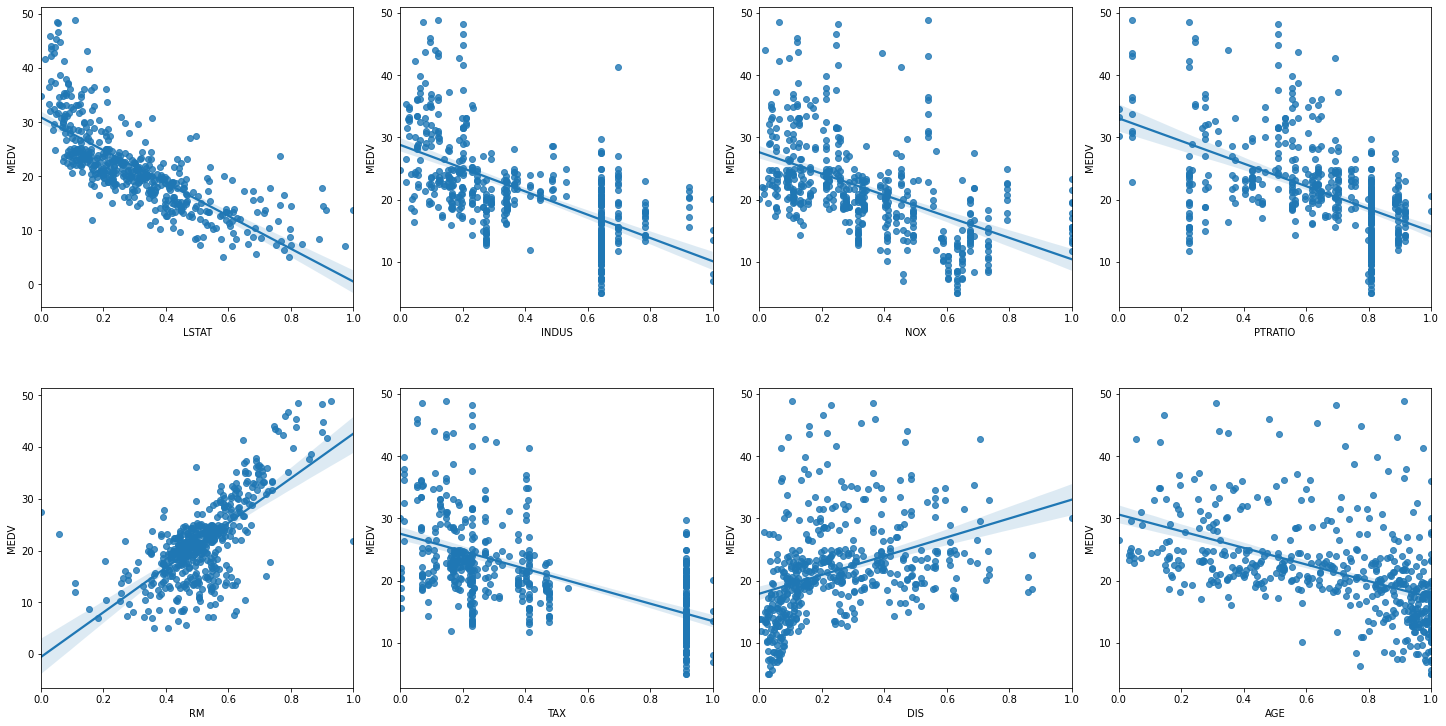

In [11]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.



In [12]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [13]:
x.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675
1,0.181441,0.210621,0.159428,0.440312,0.547998,0.099811,0.299010,0.578128
2,0.055397,0.210621,0.159428,0.440312,0.694386,0.099811,0.299010,0.469617
3,0.026325,0.051960,0.139941,0.500130,0.658555,0.064658,0.370303,0.365901
4,0.089001,0.051960,0.139941,0.500130,0.687105,0.064658,0.370303,0.424170


In [14]:
y.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: MEDV, dtype: float64

In [15]:
x_train,x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=33)

In [16]:
regression = LinearRegression()


In [17]:
regression.fit(x_train,y_train)
regression.predict(x_test)

array([2.79787438, 2.7234312 , 3.06426464, 3.26779228, 2.83621779,
       2.97942464, 3.25948566, 2.66728142, 2.30919735, 3.15465119,
       3.24098382, 3.26622749, 3.34929493, 3.43104902, 3.35182915,
       3.46736651, 2.68717332, 3.3198084 , 2.73543247, 3.37015504,
       3.00539961, 2.85911064, 3.50440874, 2.79375201, 2.99486531,
       2.25364353, 3.16393785, 2.86346563, 3.3375726 , 2.7082553 ,
       3.05664293, 3.18363379, 3.06662394, 3.1419274 , 3.26049117,
       2.7448822 , 2.61009343, 2.88130374, 3.28849022, 2.54808731,
       3.35515562, 2.81422949, 3.16458988, 3.00580295, 3.29942204,
       2.84242616, 2.80155026, 3.10863115, 2.75283603, 2.71869583,
       3.58274167, 3.49545282, 2.82558107, 3.12184406, 2.82238896,
       3.42817683, 3.08444747, 3.48043149, 3.2514687 , 2.54822584,
       3.20935938, 2.66887878, 3.41069015, 3.39738501, 2.68349266,
       2.68386208, 2.59211515, 3.3401193 , 3.17953672, 3.47305793,
       2.66848547, 2.7708898 , 2.50479277, 2.77325455, 2.83827

In [18]:

pickle.dump(regression, open('boston.pickle', 'wb'))

In [19]:
# checking R2 value
regression.score(x_test, y_test).round(2)

0.63

In [20]:
# adjusted r2
def r2_Adj(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [21]:
r2_Adj(x_test, y_test).round(2)

0.6

In [22]:
# calculating the coefficient and intercept
print("The coefficient is -->\n",regression.coef_)
print("The intercept value is --> \n",regression.intercept_)

The coefficient is -->
 [-1.49636528  0.05674907 -0.34882739 -0.43331219  0.50524898 -0.2918025
 -0.48007968  0.02954133]
The intercept value is --> 
 3.6518235128049468


In [23]:
# LASSO

In [24]:
lasso = LassoCV(cv = 10, max_iter=500000, normalize=True)
lasso.fit(x_train, y_train)

LassoCV(cv=10, max_iter=500000, normalize=True)

In [25]:
lasso.alpha_

0.00012307881739626863

In [26]:
reg_lasso = Lasso(alpha=lasso.alpha_)
reg_lasso.fit(x_train, y_train)

Lasso(alpha=0.00012307881739626863)

In [27]:
reg_lasso.score(x_test, y_test)

0.6327845078291323

In [28]:
pickle.dump(reg_lasso, open('boston_lasso.pickle', 'wb'))

In [29]:
# adjusted r2
def r2_Adj(x,y):
    r2 = reg_lasso.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [30]:
r2_Adj(x_test, y_test)

0.5997763737014139

In [31]:
# RIDGE

In [32]:
ridge = RidgeCV(alphas=(0.1,1.0,10.0), cv=10, normalize=True)
ridge.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [33]:
ridge.alpha_

0.1

In [34]:
np.random.uniform(0,10,50)

array([2.63359584, 5.33355615, 6.11369731, 0.78496864, 0.26814836,
       9.08906727, 2.8355624 , 3.53626726, 9.65776991, 9.4967561 ,
       8.63985352, 7.98806707, 7.20799677, 9.85218567, 2.71110907,
       6.17107091, 5.83238009, 4.30155565, 0.61976979, 5.66763398,
       7.77991655, 0.73280574, 9.54297199, 0.84024822, 5.78205911,
       4.50932457, 0.1038262 , 0.30120543, 7.62716702, 7.44254465,
       3.52659029, 7.30190028, 3.60214928, 6.2411327 , 4.75242658,
       9.32526552, 0.69649422, 3.89476658, 8.55773563, 6.93185482,
       8.1550342 , 3.6960252 , 3.84746657, 5.83863684, 4.71205224,
       7.66194034, 8.59862447, 1.16305495, 5.53560656, 1.32037544])

In [35]:
reg_ridge = Ridge(alpha=ridge.alpha_)
reg_ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [36]:
pickle.dump(reg_ridge, open('boston_ridge.pickle', 'wb'))

In [37]:
reg_ridge.score(x_test,y_test)

0.6350211804295536

In [38]:
# ELESTIC

In [39]:
elestic = ElasticNetCV(alphas=None, cv = 10)
elestic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [40]:
elestic.alpha_

0.0006876983301533111

In [41]:
elestic.l1_ratio_

0.5

In [42]:
reg_elestic = ElasticNet(alpha=elestic.alpha_, l1_ratio=elestic.l1_ratio_)
reg_elestic.fit(x_train, y_train)

ElasticNet(alpha=0.0006876983301533111)

In [43]:
pickle.dump(reg_elestic, open('boston_elestic.pickle', 'wb'))

In [44]:
reg_elestic.score(x_test,y_test)

0.6386943412080162

In [ ]:
# Model testing

In [55]:
lr = pickle.load(open('boston.pickle', 'rb'))
lr.predict([[0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675]]).round(2)

array([3.47])

In [57]:
lr_ridge = pickle.load(open('boston_ridge.pickle', 'rb'))
lr_ridge.predict([[0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675]]).round(2)

array([3.46])

In [58]:
lr_lasso = pickle.load(open('boston_lasso.pickle', 'rb'))

lr_lasso.predict([[0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675]]).round(2)

array([3.47])

In [59]:
lr_elestic = pickle.load(open('boston_elestic.pickle', 'rb'))

lr_elestic.predict([[0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675]]).round(2)

array([3.47])